In [1]:
# 使用networkX计算节点的pagerank
import networkx as nx
import matplotlib.pyplot as plt

简化版模型

有向图如下

\begin{bmatrix} 
\infty & 1 & 1 & 1\\ 
1 & \infty & \infty & 1\\
1 & \infty & \infty & \infty \\
\infty & 1 & 1 & \infty
\end{bmatrix}

In [2]:
# 创建有向图
G = nx.DiGraph()

# 设置有向图的边集合
edges = [("A", "B"), ("A", "C"), ("A", "D"), ("B", "A"), ("B", "D"), ("C", "A"), ("D", "B"), ("D", "C")]

In [4]:
# 在有向图G中添加边集合
for edge in edges:
    G.add_edge(edge[0], edge[1])

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


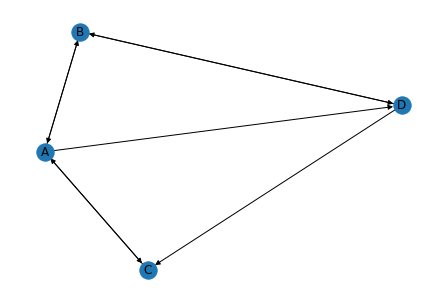

In [5]:
# 有向图可视化
layout = nx.spring_layout(G)
nx.draw(G, pos=layout, with_labels=True, hold=False)
plt.show()

In [6]:
# 计算简化模型的PR值
pr = nx.pagerank(G, alpha=1)
print("简化模型的PR值：", pr)

# 计算随机模型的PR值
pr = nx.pagerank(G, alpha=0.8)
print("随机模型的PR值：", pr)

简化模型的PR值： {'A': 0.33333396911621094, 'B': 0.22222201029459634, 'C': 0.22222201029459634, 'D': 0.22222201029459634}
随机模型的PR值： {'A': 0.3214290507775999, 'B': 0.22619031640746662, 'C': 0.22619031640746662, 'D': 0.22619031640746662}


随机游走

In [11]:
import numpy as np

# 定义3个转移矩阵，a正常，a_leak有权重泄露，a_sink是权重沉没
a = np.array([[0, 1/2, 1, 0], 
              [1/3, 0, 0, 1/2],
              [1/3, 0, 0, 1/2],
              [1/3, 1/2, 0, 0]])

a_leak = np.array([[0, 0, 0, 1/2], 
                   [0, 0, 0, 1/2],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0]])

a_sink = np.array([[0, 0, 0, 0], 
                   [1/2, 0, 0, 1],
                   [0, 1, 1, 0],
                   [1/2, 0, 0, 0]])

# 初始权重
b = np.array([1/4, 1/4, 1/4, 1/4])
w = b

def work(a, w):
    for i in range(100):
        w = np.dot(a, w)
        print(f'Round {i}:\t {w}')

def random_work(a, w, n):
    d = 0.85
    for i in range(100):
        w = (1-d)/n + d*np.dot(a, w)
        print(f'Round {i}:\t {w}')

In [13]:
#work(a, w)
#random_work(a, w, 4)
random_work(a_leak, w, 4)
#random_work(a_sink, w, 4)

Round 0:	 [0.14375 0.14375 0.25    0.25   ]
Round 1:	 [0.14375   0.14375   0.1596875 0.25     ]
Round 2:	 [0.14375    0.14375    0.1596875  0.17323437]
Round 3:	 [0.11112461 0.11112461 0.1596875  0.17323437]
Round 4:	 [0.11112461 0.11112461 0.13195592 0.17323437]
Round 5:	 [0.11112461 0.11112461 0.13195592 0.14966253]
Round 6:	 [0.10110658 0.10110658 0.13195592 0.14966253]
Round 7:	 [0.10110658 0.10110658 0.12344059 0.14966253]
Round 8:	 [0.10110658 0.10110658 0.12344059 0.1424245 ]
Round 9:	 [0.09803041 0.09803041 0.12344059 0.1424245 ]
Round 10:	 [0.09803041 0.09803041 0.12082585 0.1424245 ]
Round 11:	 [0.09803041 0.09803041 0.12082585 0.14020197]
Round 12:	 [0.09708584 0.09708584 0.12082585 0.14020197]
Round 13:	 [0.09708584 0.09708584 0.12002296 0.14020197]
Round 14:	 [0.09708584 0.09708584 0.12002296 0.13951952]
Round 15:	 [0.0967958  0.0967958  0.12002296 0.13951952]
Round 16:	 [0.0967958  0.0967958  0.11977643 0.13951952]
Round 17:	 [0.0967958  0.0967958  0.11977643 0.13930996]
